## Five Link Solver

This notebok solves and graphs the kinematics of a five link suspension

In [ ]:
#imports and graph configs
from suspension_kinematics.independent_suspension import Five_Link
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc
from vpython import points, curve, vector, color
from sympy.solvers import solve
from sympy import Symbol

plt.rcParams['xtick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['ytick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['axes.linewidth']=3        # change the line width of the axis
plt.rcParams['xtick.major.width'] = 3   # change the tick line width of x axis
plt.rcParams['ytick.major.width'] = 3   # change the tick line width of y axis 
rc('text', usetex=False)                # disable LaTeX rendering in plots
rc('font',**{'family':'DejaVu Sans'})   # set the font of the plot to be DejaVu Sans

<IPython.core.display.Javascript object>

# Configure Geometry

In [ ]:

link_lengths = np.atleast_2d(np.array([5,5,5,5,5.1])).T

frame_pickups = np.array([[0,1,1],
                          [0,-1,1],
                          [0,-1,-1],
                          [0,1,-1],
                          [0,1.5,0]])

upright_pickups = np.array([[0,0.9,0.9],
                          [0,-0.9,0.9],
                          [0,-0.9,-0.9],
                          [0,0.9,-0.9],
                          [0,1.5,0]])


fl = Five_Link(frame_pickups, link_lengths, upright_pickups)

Here are functions used to configure the driving variable and creat the table of solutions 

In [15]:
#solves suspension kinematics system of equations in terms of z
def solve_z(z, guess, model):
    driving_var = 2
    
    def function(vars):
        return model.full_sys_of_eq(vars, driving_var, z)
    
    def jacobian(vars):
        return model.jacobian(vars, driving_var)

    
    return sp.optimize.fsolve(function, guess, fprime=jacobian) 

#solves for a list of inputs, using each output as a guess for the next solution
def create_table(inputs, solver, system, inital_guess):
    
    outputs = np.zeros([len(inputs),len(inital_guess)])
    
    guess = inital_guess
    for i, input in enumerate(inputs):
            outputs[i] = solver(input, guess, system)
            guess = outputs[i]


    return outputs

This creates the table of solutionsusing an inital guess

In [16]:
x_0 = np.array([ 5, 0, -1, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
z_vals = np.linspace(-1, 1, 500)
positions = create_table(z_vals, solve_z, fl, x_0)

C:\Users\fenne\AppData\Local\Temp\ipykernel_2260\1581166808.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return sp.optimize.fsolve(function, guess, fprime=jacobian)
C:\Users\fenne\AppData\Local\Temp\ipykernel_2260\1581166808.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  return sp.optimize.fsolve(function, guess, fprime=jacobian)


Here is the graphing of the wheel position and orientation for various z posisions

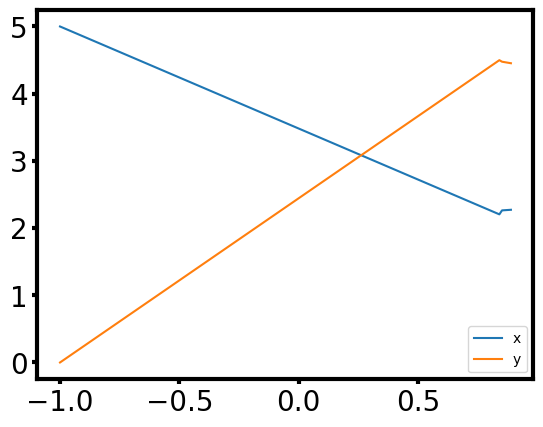

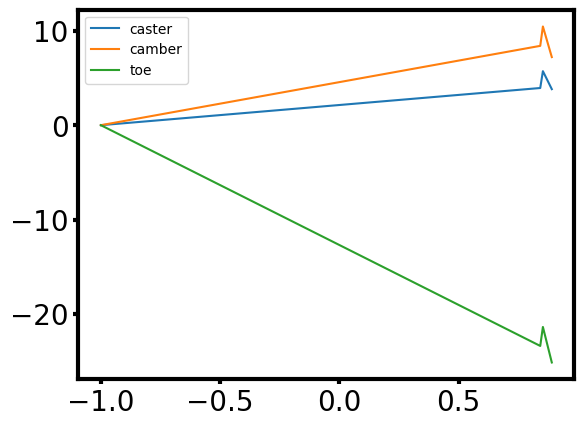

In [17]:
z = positions[:,2]

x = positions[:,0]
y = positions[:,1]
plt.plot(z, x)
plt.plot(z, y)
plt.legend(["x","y"])
plt.show()


caster = positions[:,3]
camber = positions[:,4]
toe = positions[:,5]
plt.plot(z, caster*180/np.pi)
plt.plot(z, camber*180/np.pi)
plt.plot(z, toe*180/np.pi)
plt.legend(["caster", "camber", "toe"])
plt.show()